In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
df=pd.read_csv("spam.csv",encoding='ISO-8859-1', usecols=[0, 1])


In [2]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ham_spam=df.v1.value_counts()
ham_spam

v1
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
df["label"]=df.v1.map({'ham':0,'spam':1})

In [5]:
df.head()

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X=df.v2
y=df.label


# converting non catogorical text data

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect= CountVectorizer()
count_matrix=count_vect.fit_transform(X)
count_array=count_matrix.toarray()


data=pd.DataFrame(data=count_array,columns=count_vect.get_feature_names_out())
data.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
count_vect.vocabulary_

{'go': 3550,
 'until': 8030,
 'jurong': 4350,
 'point': 5920,
 'crazy': 2327,
 'available': 1303,
 'only': 5537,
 'in': 4087,
 'bugis': 1751,
 'great': 3634,
 'world': 8489,
 'la': 4476,
 'buffet': 1749,
 'cine': 2048,
 'there': 7645,
 'got': 3594,
 'amore': 1069,
 'wat': 8267,
 'ok': 5504,
 'lar': 4512,
 'joking': 4318,
 'wif': 8392,
 'oni': 5533,
 'free': 3358,
 'entry': 2949,
 'wkly': 8447,
 'comp': 2165,
 'to': 7756,
 'win': 8405,
 'fa': 3087,
 'cup': 2386,
 'final': 3207,
 'tkts': 7743,
 '21st': 411,
 'may': 4930,
 '2005': 402,
 'text': 7595,
 '87121': 784,
 'receive': 6297,
 'question': 6190,
 'std': 7230,
 'txt': 7933,
 'rate': 6242,
 'apply': 1156,
 '08452810075over18': 77,
 'dun': 2802,
 'say': 6633,
 'so': 7024,
 'early': 2823,
 'hor': 3927,
 'already': 1042,
 'then': 7640,
 'nah': 5238,
 'don': 2712,
 'think': 7660,
 'he': 3781,
 'goes': 3558,
 'usf': 8075,
 'lives': 4665,
 'around': 1207,
 'here': 3831,
 'though': 7680,
 'freemsg': 3365,
 'hey': 3841,
 'darling': 2443,
 'it

In [9]:
count_matrix.shape

(5572, 8672)

In [10]:

count_vect.get_feature_names_out()

array(['00', '000', '000pes', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

In [11]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2))
X_vect=vect.fit_transform(X)

# TFIDF transformer

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer()
X_tfidf=tfidf_transformer.fit_transform(X_vect)

In [13]:
tokens=vect.get_feature_names_out()
data_idf=pd.DataFrame(tfidf_transformer.idf_, index=tokens, columns = ['idf_weights'])
data_idf.head()

,idf_weights
00,7.227794
00 easter,8.932542
00 sub,7.833929
00 subs,8.527076
000,6.293484


In [14]:
first_document_vector=X_tfidf[0]
data=pd.DataFrame(first_document_vector.T.todense(),index=tokens,columns=['tf-idf'])
data.sort_values(by=["tf-idf"],ascending=False)

,tf-idf
point crazy,0.222948
available bugis,0.222948
jurong point,0.222948
amore wat,0.222948
amore,0.222948
...,...
frontierville,0.000000
frontierville good,0.000000
frosty,0.000000
frosty snowman,0.000000


### sumof word freq

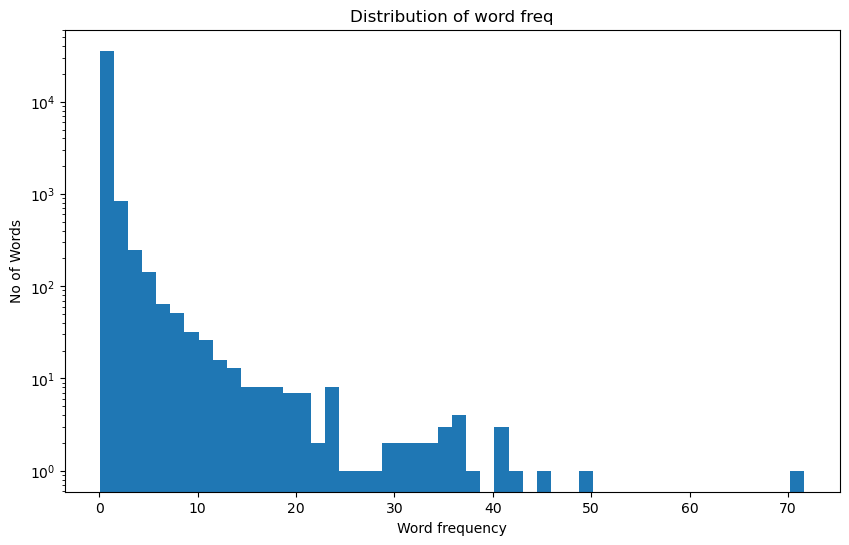

In [15]:
word_freq=X_tfidf.sum(axis=0)
#convert to list
word_freq=word_freq.tolist()[0]

plt.figure(figsize=(10,6))
plt.hist(word_freq,bins=50,log=True)
plt.xlabel('Word frequency')
plt.ylabel('No of Words')
plt.title("Distribution of word freq")
plt.show()

# oversampling

In [16]:
#!pip install --upgrade imbalanced-learn

In [17]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_tfidf,y)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix


mnb=MultinomialNB()
naive_model=mnb.fit(X_train,y_train)
y_pred_class=mnb.predict(X_test)

print(classification_report(y_test,y_pred_class))
                         

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       985
           1       0.98      1.00      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [22]:
import joblib
joblib.dump(naive_model, 'naive_model.joblib')
joblib.dump(vect, 'CountVectorizer.joblib')
joblib.dump(tfidf_transformer, 'tfidf_transformer.joblib')

['tfidf_transformer.joblib']

In [23]:
model = joblib.load('naive_model.joblib')
vect = joblib.load('CountVectorizer.joblib')
tfidf = joblib.load('tfidf_transformer.joblib')

text1 ="Congratulations! You have won a free vacation. Claim your prize now!"
text2 = "Good morning. Have a nice day"

preprocessed_text = vect.transform([text1])
preprocessed_text_tfidf = tfidf.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The message is a spam!!!")
else:
    print("The message is not spam")

[1]
The message is a spam!!!


In [24]:
text2 = "Good morning. Have a nice day"

preprocessed_text = vect.transform([text2])
preprocessed_text_tfidf = tfidf.transform(preprocessed_text)

# Predict
output = model.predict(preprocessed_text_tfidf)

print(output)

if output[0] == 1:
    print("The message is a spam!!!")
else:
    print("The message is not spam")

[0]
The message is not spam
